In [20]:
from torch import manual_seed
from functools import partial
from matplotlib.pyplot import plot

from pathlib import Path
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.models.linear import Linear
from karpathy_series.makemore.models.perceptron import Perceptron
from karpathy_series.makemore.encoding.character import CharacterEncoder, CharacterSet
from karpathy_series.makemore.training.data import TrainingSequencer
from karpathy_series.makemore.training.learning import Learner
from karpathy_series.makemore.models.generation import BiGramNetGenerator
from karpathy_series.makemore.bigrams import BiGram

%matplotlib inline
rand_source = manual_seed(2147483647)

In [22]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_gram_gen = partial(BiGram.generate, ".")
ts_bi = TrainingSequencer(char_encoder, char_encoder, bi_gram_gen)

In [23]:
linear = Linear.init_random_from_size(char_encoder.size, char_encoder.size)
generator = BiGramNetGenerator(char_set, char_encoder, linear)
losses = []

In [24]:
training_sequence = ts_bi.training_sequence(words, 100, True)
xis_v, yis_v = ts_bi.training_set(words)

In [15]:
learner = Learner(linear, 10)
losses += learner(training_sequence, epochs=100, report_epochs=10)

Epoch 10 is finished with loss = 2.502013921737671
Epoch 20 is finished with loss = 2.3822524547576904
Epoch 30 is finished with loss = 2.437615394592285
Epoch 40 is finished with loss = 2.484553337097168
Epoch 50 is finished with loss = 2.3631796836853027
Epoch 60 is finished with loss = 2.453094005584717
Epoch 70 is finished with loss = 2.3749213218688965
Epoch 80 is finished with loss = 2.503520965576172
Epoch 90 is finished with loss = 2.502284526824951
Epoch 100 is finished with loss = 2.5687649250030518


In [17]:
linear.run(xis_v, yis_v)

tensor(2.4573, grad_fn=<NllLossBackward0>)

In [11]:
generator()

'chabadayra'

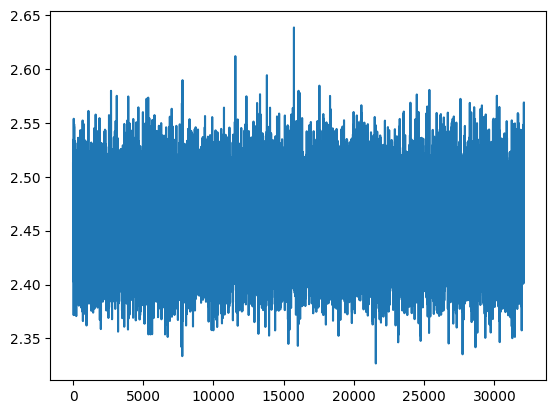

In [18]:
plot(losses)

In [ ]:
multi_layer = Perceptron.init_random_from_size(char_encoder.size, char_encoder.size, [300, 100])
multi_layer_generator = BiGramNetGenerator(char_set, char_encoder, multi_layer)

In [ ]:
m_learner = Learner(multi_layer, 50)
m_learner(training_sequence, epochs=100, report_epochs=20)

In [ ]:
multi_layer_generator()